# Pandas 

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Object Creation
Creating a `Series` by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a `DataFrame` by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.144182,-1.161072,-0.829557,0.488064
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-03,0.026966,0.487039,0.355740,-0.852359
2013-01-04,-1.402584,0.059513,1.048392,-1.399132
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980
2013-01-06,-0.677359,-0.438768,-1.072569,-1.381580


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A': 1.,'B': pd.Timestamp('20130102'),
         'C': pd.Series(1, index=list(range(4)), dtype='float32'),
         'D': np.array([3] * 4, dtype='int32'),
         'E': pd.Categorical(["test", "train", "test", "train"]),
         'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data
Here is how to view the top and bottom rows of the frame:

In [7]:
df.head()

,A,B,C,D
2013-01-01,-1.144182,-1.161072,-0.829557,0.488064
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-03,0.026966,0.487039,0.355740,-0.852359
2013-01-04,-1.402584,0.059513,1.048392,-1.399132
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.402584,0.059513,1.048392,-1.399132
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980
2013-01-06,-0.677359,-0.438768,-1.072569,-1.381580


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

`describe()` shows a quick statistic summary of your data:

In [15]:
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.703798,-0.720439,-0.098666,-0.648478
std,0.509524,0.917865,0.867792,0.852251
min,-1.402584,-1.951616,-1.072569,-1.399132
25%,-1.027476,-1.278567,-0.787526,-1.310180
50%,-0.627043,-0.799920,-0.152848,-0.974169
75%,-0.480860,-0.065057,0.514511,0.049498
max,0.026966,0.487039,1.048392,0.488064


Transposing your data:

In [16]:
df.T


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-1.144182,-0.448904,0.026966,-1.402584,-0.576728,-0.677359
B,-1.161072,-1.317732,0.487039,0.059513,-1.951616,-0.438768
C,-0.829557,0.567434,0.355740,1.048392,-0.661435,-1.072569
D,0.488064,0.350116,-0.852359,-1.399132,-1.095980,-1.381580


Sorting by an axis:

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.488064,-0.829557,-1.161072,-1.144182
2013-01-02,0.350116,0.567434,-1.317732,-0.448904
2013-01-03,-0.852359,0.355740,0.487039,0.026966
2013-01-04,-1.399132,1.048392,0.059513,-1.402584
2013-01-05,-1.095980,-0.661435,-1.951616,-0.576728
2013-01-06,-1.381580,-1.072569,-0.438768,-0.677359


Sorting by values:


In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-01,-1.144182,-1.161072,-0.829557,0.488064
2013-01-06,-0.677359,-0.438768,-1.072569,-1.381580
2013-01-04,-1.402584,0.059513,1.048392,-1.399132
2013-01-03,0.026966,0.487039,0.355740,-0.852359


## Selection
### Getting
Selecting a single column, which yields a Series, equivalent to `df.A`:

In [19]:
df['A']


2013-01-01   -1.144182
2013-01-02   -0.448904
2013-01-03    0.026966
2013-01-04   -1.402584
2013-01-05   -0.576728
2013-01-06   -0.677359
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [20]:
 df[0:3]


,A,B,C,D
2013-01-01,-1.144182,-1.161072,-0.829557,0.488064
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-03,0.026966,0.487039,0.355740,-0.852359


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-03,0.026966,0.487039,0.355740,-0.852359
2013-01-04,-1.402584,0.059513,1.048392,-1.399132


### Selection by Label
For getting a cross section using a label:

In [22]:
df.loc[dates[0]]

A   -1.144182
B   -1.161072
C   -0.829557
D    0.488064
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:


In [23]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-1.144182,-1.161072
2013-01-02,-0.448904,-1.317732
2013-01-03,0.026966,0.487039
2013-01-04,-1.402584,0.059513
2013-01-05,-0.576728,-1.951616
2013-01-06,-0.677359,-0.438768


Showing label slicing, both endpoints are included:

In [24]:
df.loc['20130102':'20130104', ['A', 'B']]


,A,B
2013-01-02,-0.448904,-1.317732
2013-01-03,0.026966,0.487039
2013-01-04,-1.402584,0.059513


Reduction in the dimensions of the returned object:


In [25]:
df.loc['20130102', ['A', 'B']]


A   -0.448904
B   -1.317732
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [26]:
df.loc[dates[0], 'A']


-1.1441823649210852

For getting fast access to a scalar (equivalent to the prior method):

In [27]:
df.at[dates[0], 'A']


-1.1441823649210852

### Selection by Position
Select via the position of the passed integers:

In [28]:
df.iloc[3]

A   -1.402584
B    0.059513
C    1.048392
D   -1.399132
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to `numpy`:

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.402584,0.059513
2013-01-05,-0.576728,-1.951616


For slicing rows explicitly:

In [30]:
df.iloc[1:3, :]


,A,B,C,D
2013-01-02,-0.448904,-1.317732,0.567434,0.350116
2013-01-03,0.026966,0.487039,0.355740,-0.852359


For slicing columns explicitly:

In [31]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.161072,-0.829557
2013-01-02,-1.317732,0.567434
2013-01-03,0.487039,0.355740
2013-01-04,0.059513,1.048392
2013-01-05,-1.951616,-0.661435
2013-01-06,-0.438768,-1.072569


### Boolean Indexing
Using a single column’s values to select data.

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.026966,0.487039,0.35574,-0.852359


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,0.488064
2013-01-02,NaN,NaN,0.567434,0.350116
2013-01-03,0.026966,0.487039,0.355740,NaN
2013-01-04,NaN,0.059513,1.048392,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN


Using the `isin()` method for filtering:

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.144182,-1.161072,-0.829557,0.488064,one
2013-01-02,-0.448904,-1.317732,0.567434,0.350116,one
2013-01-03,0.026966,0.487039,0.355740,-0.852359,two
2013-01-04,-1.402584,0.059513,1.048392,-1.399132,three
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980,four
2013-01-06,-0.677359,-0.438768,-1.072569,-1.381580,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.026966,0.487039,0.355740,-0.852359,two
2013-01-05,-0.576728,-1.951616,-0.661435,-1.095980,four


### Setting


In [40]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label or position:

In [41]:
df.at[dates[0], 'A'] = 0
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:


In [42]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.829557,5,NaN
2013-01-02,-0.448904,-1.317732,0.567434,5,1.0
2013-01-03,0.026966,0.487039,0.355740,5,2.0
2013-01-04,-1.402584,0.059513,1.048392,5,3.0
2013-01-05,-0.576728,-1.951616,-0.661435,5,4.0
2013-01-06,-0.677359,-0.438768,-1.072569,5,5.0


A `where` operation with setting.

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.829557,-5,NaN
2013-01-02,-0.448904,-1.317732,-0.567434,-5,-1.0
2013-01-03,-0.026966,-0.487039,-0.355740,-5,-2.0
2013-01-04,-1.402584,-0.059513,-1.048392,-5,-3.0
2013-01-05,-0.576728,-1.951616,-0.661435,-5,-4.0
2013-01-06,-0.677359,-0.438768,-1.072569,-5,-5.0


### Missing Data
pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.


In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.829557,5,NaN,1.0
2013-01-02,-0.448904,-1.317732,0.567434,5,1.0,1.0
2013-01-03,0.026966,0.487039,0.355740,5,2.0,NaN
2013-01-04,-1.402584,0.059513,1.048392,5,3.0,NaN


To drop any rows that have missing data.

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.448904,-1.317732,0.567434,5,1.0,1.0


Filling missing data.

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.829557,5,5.0,1.0
2013-01-02,-0.448904,-1.317732,0.567434,5,1.0,1.0
2013-01-03,0.026966,0.487039,0.355740,5,2.0,5.0
2013-01-04,-1.402584,0.059513,1.048392,5,3.0,5.0


To get the boolean mask where values are `nan`.

In [47]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
### Statistics
Operations in general exclude missing data.
Performing a descriptive statistic:

In [48]:
df.mean()


A   -0.513101
B   -0.526927
C   -0.098666
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [49]:
df.mean(1)


2013-01-01    1.042611
2013-01-02    0.960160
2013-01-03    1.573949
2013-01-04    1.541064
2013-01-05    1.162044
2013-01-06    1.562261
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.973034,-0.512961,-0.644260,4.0,1.0
2013-01-04,-4.402584,-2.940487,-1.951608,2.0,0.0
2013-01-05,-5.576728,-6.951616,-5.661435,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply
Applying functions to the data:


In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.829557,5,NaN
2013-01-02,-0.448904,-1.317732,-0.262123,10,1.0
2013-01-03,-0.421938,-0.830693,0.093617,15,3.0
2013-01-04,-1.824522,-0.771180,1.142009,20,6.0
2013-01-05,-2.401250,-2.722796,0.480574,25,10.0
2013-01-06,-3.078609,-3.161564,-0.591995,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    1.429550
B    2.438655
C    2.120961
D    0.000000
F    4.000000
dtype: float64

## Merge
### Concat

pandas provides various facilities for easily combining together `Series`, `DataFrame`, and `Panel` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with `concat()`:

In [54]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.297711,0.558034,-0.333166,-0.326604
1,-0.373227,-0.113591,-0.100715,1.465374
2,0.397052,-0.241817,0.086523,0.925654
3,0.249892,0.665728,-1.900854,0.378549
4,0.490104,-0.315372,0.168092,1.368649
5,0.813410,-1.162853,0.801249,0.550024
6,-1.184604,0.396773,-0.851960,-0.057519
7,0.003906,1.155917,-0.109845,0.733677
8,-0.801198,1.341571,-1.333396,0.239549
9,0.508754,0.708061,0.278248,-0.855685


In [55]:
pieces = [df[:3], df[3:7], df[7:]]

In [56]:
pd.concat(pieces)

,0,1,2,3
0,-1.297711,0.558034,-0.333166,-0.326604
1,-0.373227,-0.113591,-0.100715,1.465374
2,0.397052,-0.241817,0.086523,0.925654
3,0.249892,0.665728,-1.900854,0.378549
4,0.490104,-0.315372,0.168092,1.368649
5,0.813410,-1.162853,0.801249,0.550024
6,-1.184604,0.396773,-0.851960,-0.057519
7,0.003906,1.155917,-0.109845,0.733677
8,-0.801198,1.341571,-1.333396,0.239549
9,0.508754,0.708061,0.278248,-0.855685


### Join
Same key:

In [57]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [58]:
right

,key,rval
0,foo,4
1,foo,5


In [59]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Different keys:

In [60]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [61]:
right

,key,rval
0,foo,4
1,bar,5


In [62]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append


In [65]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.867946,-0.523610,0.321592,-1.904082
1,-0.177768,1.232457,-0.429720,0.656572
2,-0.973636,0.602581,1.184729,1.072298
3,-0.029753,0.838946,-0.198997,-0.097168
4,1.482655,0.629392,0.563975,-0.426862
5,1.115576,-1.411806,0.274723,0.930671
6,0.406253,-0.202268,1.714482,-0.188965
7,0.695603,1.018511,1.086512,-0.820871


In [67]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.867946,-0.523610,0.321592,-1.904082
1,-0.177768,1.232457,-0.429720,0.656572
2,-0.973636,0.602581,1.184729,1.072298
3,-0.029753,0.838946,-0.198997,-0.097168
4,1.482655,0.629392,0.563975,-0.426862
5,1.115576,-1.411806,0.274723,0.930671
6,0.406253,-0.202268,1.714482,-0.188965
7,0.695603,1.018511,1.086512,-0.820871
8,-0.029753,0.838946,-0.198997,-0.097168


### Grouping
By “group by” we are referring to a process involving one or more of the following steps:
+ Splitting the data into groups based on some criteria
+ Applying a function to each group independently
+ Combining the results into a data structure

In [69]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df


,A,B,C,D
0,foo,one,0.254998,-0.151667
1,bar,one,1.730483,-1.570946
2,foo,two,2.384416,-0.696901
3,bar,three,-0.613454,-0.251941
4,foo,two,0.260750,-0.595791
5,bar,two,0.330247,0.256214
6,foo,one,0.036228,-0.468587
7,foo,three,0.249225,1.175980


Grouping and then applying the `sum()` function to the resulting groups.

In [70]:
df.groupby('A').sum()

,C,D
A,,
bar,1.447276,-1.566673
foo,3.185617,-0.736965


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum` function.

In [72]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.730483 -1.570946
    three -0.613454 -0.251941
    two    0.330247  0.256214
foo one    0.291227 -0.620254
    three  0.249225  1.175980
    two    2.645165 -1.292692

## Reshaping
### stack

In [73]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.085461 -1.708805
      two    -0.638590  1.827686
baz   one     2.341183  0.004430
      two    -0.931347 -0.824394

The `stack()` method “compresses” a level in the DataFrame’s columns.

In [75]:
stacked = df2.stack()
stacked


first  second   
bar    one     A    0.085461
               B   -1.708805
       two     A   -0.638590
               B    1.827686
baz    one     A    2.341183
               B    0.004430
       two     A   -0.931347
               B   -0.824394
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is `unstack()`, which by default unstacks the last level:

In [76]:
stacked.unstack()

A         B
first second                    
bar   one     0.085461 -1.708805
      two    -0.638590  1.827686
baz   one     2.341183  0.004430
      two    -0.931347 -0.824394

In [77]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.085461 -0.638590
      B -1.708805  1.827686
baz   A  2.341183 -0.931347
      B  0.004430 -0.824394

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.085461  2.341183
       B -1.708805  0.004430
two    A -0.638590 -0.931347
       B  1.827686 -0.824394

### Pivot Tables


In [79]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,1.381613,-0.602730
1,one,B,foo,1.152030,-0.062427
2,two,C,foo,0.009280,-0.033802
3,three,A,bar,-0.706965,1.304351
4,one,B,bar,-1.303473,0.875016
5,one,C,bar,-0.857425,1.374131
6,two,A,foo,-0.639860,0.811010
7,three,B,foo,0.233605,-0.302290
8,one,C,foo,-0.443320,1.042321
9,one,A,bar,0.015380,0.311401


We can produce pivot tables from this data very easily:

In [80]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.015380  1.381613
      B -1.303473  1.152030
      C -0.857425 -0.443320
three A -0.706965       NaN
      B       NaN  0.233605
      C -1.704652       NaN
two   A       NaN -0.639860
      B  0.496448       NaN
      C       NaN  0.009280

## Plotting

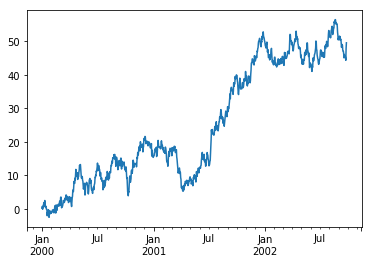

In [84]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

<Figure size 432x288 with 0 Axes>

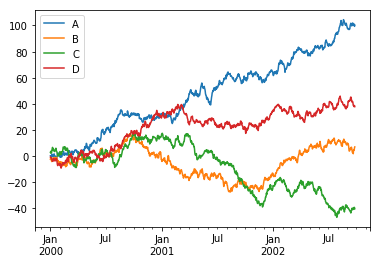

In [85]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')


## Getting Data In/Out
### CSV
Writing to a csv file

In [86]:
df.to_csv('foo.csv')

Reading from a csv file.

In [87]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.209969,-2.490287,2.805540,-0.781137
1,2000-01-02,-0.288824,-1.443563,3.661166,-1.057086
2,2000-01-03,-1.426562,-2.054280,2.199383,-1.018110
3,2000-01-04,-1.044145,-1.992721,2.426852,-1.657313
4,2000-01-05,0.719271,-4.155353,2.821110,-2.036072
5,2000-01-06,1.537288,-3.909591,4.751376,-2.488607
6,2000-01-07,0.564330,-2.692137,5.476751,-3.485312
7,2000-01-08,0.359616,-2.301465,6.673736,-3.162354
8,2000-01-09,0.788987,-1.448014,4.558152,-4.047937
9,2000-01-10,-0.606836,-2.738364,4.309859,-2.762925


In [91]:
Data = pd.read_csv('mobile_services_ranking.csv')
Data

,brand,startup,monthly,service,retail,apple,samsung,google,ranking
0,"""AT&T""","""$100""","""$100""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung NO""","""Nexus NO""",11
1,"""Verizon""","""$300""","""$100""","""4G NO""","""Retail YES""","""Apple YES""","""Samsung YES""","""Nexus NO""",12
2,"""US Cellular""","""$400""","""$200""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung YES""","""Nexus NO""",9
3,"""Verizon""","""$400""","""$400""","""4G YES""","""Retail YES""","""Apple NO""","""Samsung NO""","""Nexus NO""",2
4,"""Verizon""","""$200""","""$300""","""4G NO""","""Retail NO""","""Apple NO""","""Samsung YES""","""Nexus YES""",8
5,"""Verizon""","""$100""","""$200""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung NO""","""Nexus YES""",13
6,"""US Cellular""","""$300""","""$300""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung NO""","""Nexus NO""",7
7,"""AT&T""","""$400""","""$300""","""4G NO""","""Retail YES""","""Apple YES""","""Samsung NO""","""Nexus YES""",4
8,"""AT&T""","""$200""","""$400""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung YES""","""Nexus NO""",5
9,"""T-Mobile""","""$400""","""$100""","""4G YES""","""Retail NO""","""Apple YES""","""Samsung YES""","""Nexus YES""",16
